# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [ ]:
#!pip uninstall scikit-learn -y

#!pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [ ]:
print("Чтобы при изменении модели и других доработках мы могли понять, \
насколько сильно изменилось качество модели, потому что иначе у нас при предикте всегда \
будут разные результаты и мы не сможем понять насколько сильно мы улучшили/ухудшили результат")

Чтобы при изменении модели и других доработках мы могли понять, насколько сильно изменилось качество модели, потому что иначе у нас при предикте всегда будут разные результаты и мы не сможем понять насколько сильно мы улучшили/ухудшили результат


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [ ]:
# your code here
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [ ]:
# your code here
df_test.head(-5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Maruti Alto LXi,2007,95000,70000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
991,Honda Brio V MT,2012,376000,26000,Petrol,Individual,Manual,First Owner,19.4 kmpl,1198 CC,86.8 bhp,109Nm@ 4500rpm,5.0
992,Maruti Alto LXi,2006,85000,150000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
993,Maruti 800 DX,1999,52000,100000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [ ]:
# your code here
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [ ]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [ ]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [ ]:
df_train[df_train.drop(['selling_price'], axis = 1).duplicated()].shape[0]

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [ ]:
# your code here
df_train[df_train.drop(['selling_price'], axis = 1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [ ]:
# your code here
df_train = df_train.drop_duplicates(subset = df_train.drop(['selling_price'], axis = 1), keep='first')
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [ ]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [ ]:
# your code here
df_train = df_train.reset_index().drop('index', axis = 1)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [ ]:
def update_features(df):
  #Тут тяжело. Заменяем все буквенные и пробельные символы на пустую строку
  df_new = df[['mileage', 'engine', 'max_power']].replace(r'[^\d*.\d*@-]', '', regex=True)
  #Преобразуем в числа
  df_exc_tor = df_new.apply(pd.to_numeric)
  #Заменяем все символы кроме чисел вкл . и , на /, и также убираем последнее вхождение /
  df_exc_tor['torq'] = df['torque'].replace(r'[^\d*.,]', '/', regex=True).replace(r'/+', '/', regex=True).replace(r'/$', '', regex=True)
  #Сплитим по / и берем 0 значение - это torque
  df_exc_tor['torque'] = df_exc_tor['torq'].apply(lambda t: str(t).split('/')[0])
  #Заменяем запятые на точки для успешного преобразования в float
  df_exc_tor['max_torque_rpm'] = df_exc_tor['torq'].replace(r',', '.', regex=True)
  #Сплитим по / и берем последнее значение - это max_torque_rpm
  df_exc_tor['max_torque_rpm'] = df_exc_tor['max_torque_rpm'].apply(lambda t: str(t).split('/').pop())
  #Убираем промежуточное значение из датафрейма
  df_exc_tor = df_exc_tor.drop('torq', axis = 1)
  #Заполняем пропуски и битые значения на медиану
  df_exc_tor = df_exc_tor.fillna(df_exc_tor.median()).replace(r'nan', df_exc_tor.median(), regex=True)
  #Переводим оставшиеся значения в float
  df_exc_tor = df_exc_tor.apply(pd.to_numeric)

  return df_exc_tor

In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [ ]:
df_train[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']] = update_features(df_train)

In [ ]:
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage             0
engine              0
max_power           0
torque              0
seats             186
max_torque_rpm      0
dtype: int64

In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0,2750.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.50,5.0,4.50
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0,4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.10,5.0,3000.00
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.00,5.0,3500.00
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.70,5.0,4000.00
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24.00,5.0,2.75


In [ ]:
df_test[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']] = update_features(df_test)

In [ ]:
df_test.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque             0
seats             19
max_torque_rpm     0
dtype: int64

In [ ]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260.00,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260.00,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172.00,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200.00,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96.00,5.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04,5.0,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.70,5.0,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0,2750.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.80,5.0,4000.0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [ ]:
print("Потому что модель линейная. Количество кресел не сильно влияет на цену авто, \
но из за концепции модели, у нас коэффициент при сиденьях будет умножаться на количество кресел, что неверно влияет на модель")

Потому что модель линейная. Количество кресел не сильно влияет на цену авто, но из за концепции модели, у нас коэффициент при сиденьях будет умножаться на количество кресел, что неверно влияет на модель


In [ ]:
# your code here
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median()).replace(r'nan', df_train['seats'].median(), regex=True)
df_test['seats'] = df_test['seats'].fillna(df_test['seats'].median()).replace(r'nan', df_test['seats'].median(), regex=True)

In [ ]:
df_train[['seats', 'engine']] = df_train[['seats', 'engine']].astype(int)
df_test[['seats', 'engine']] = df_test[['seats', 'engine']].astype(int)

In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.40,5,2750.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.50,5,4.50
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.10,5,3000.00
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.00,5,3500.00
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.70,5,4000.00
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.00,5,2.75


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

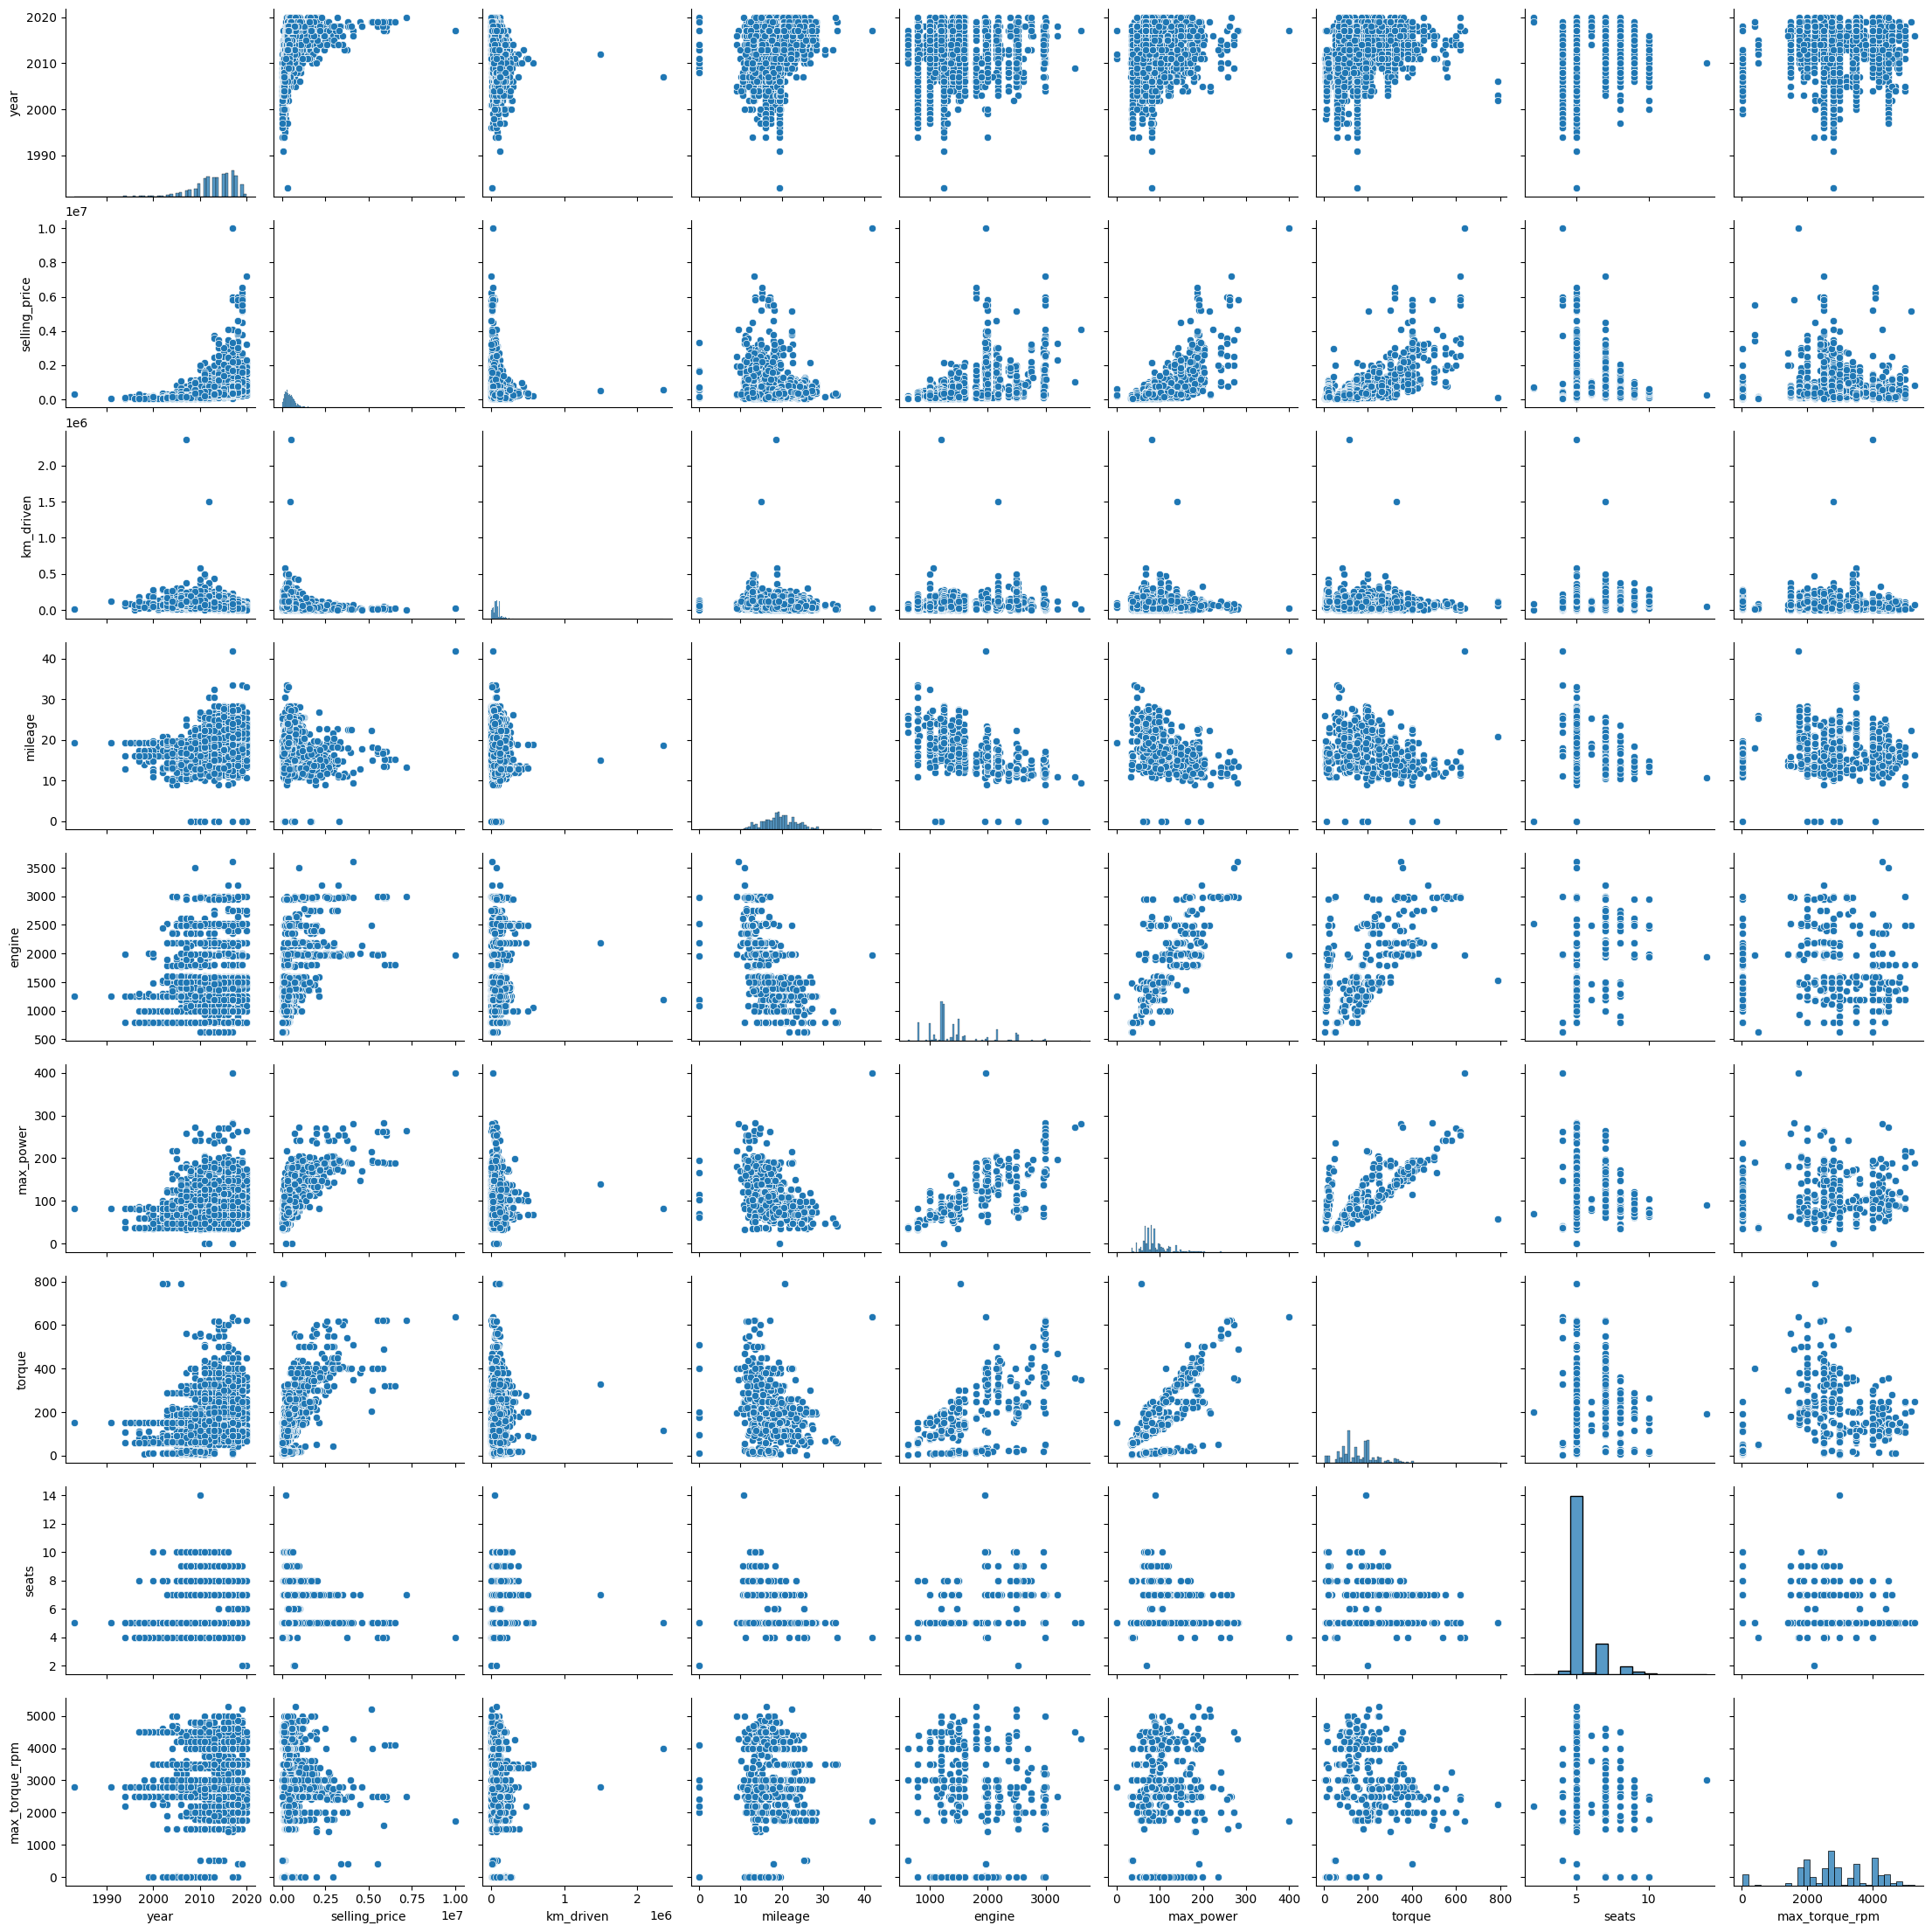

In [ ]:
# your code here
sns.pairplot(df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis = 1))

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Чем старше машина - тем дешевле она стоит \\
Чем больше мощность, тем дороже стоит машина \\
Чем меньше пробег, тем дороже стоит машина



О корреляции как пример:
Чем меньше сидений в машине, тем она мощнее

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

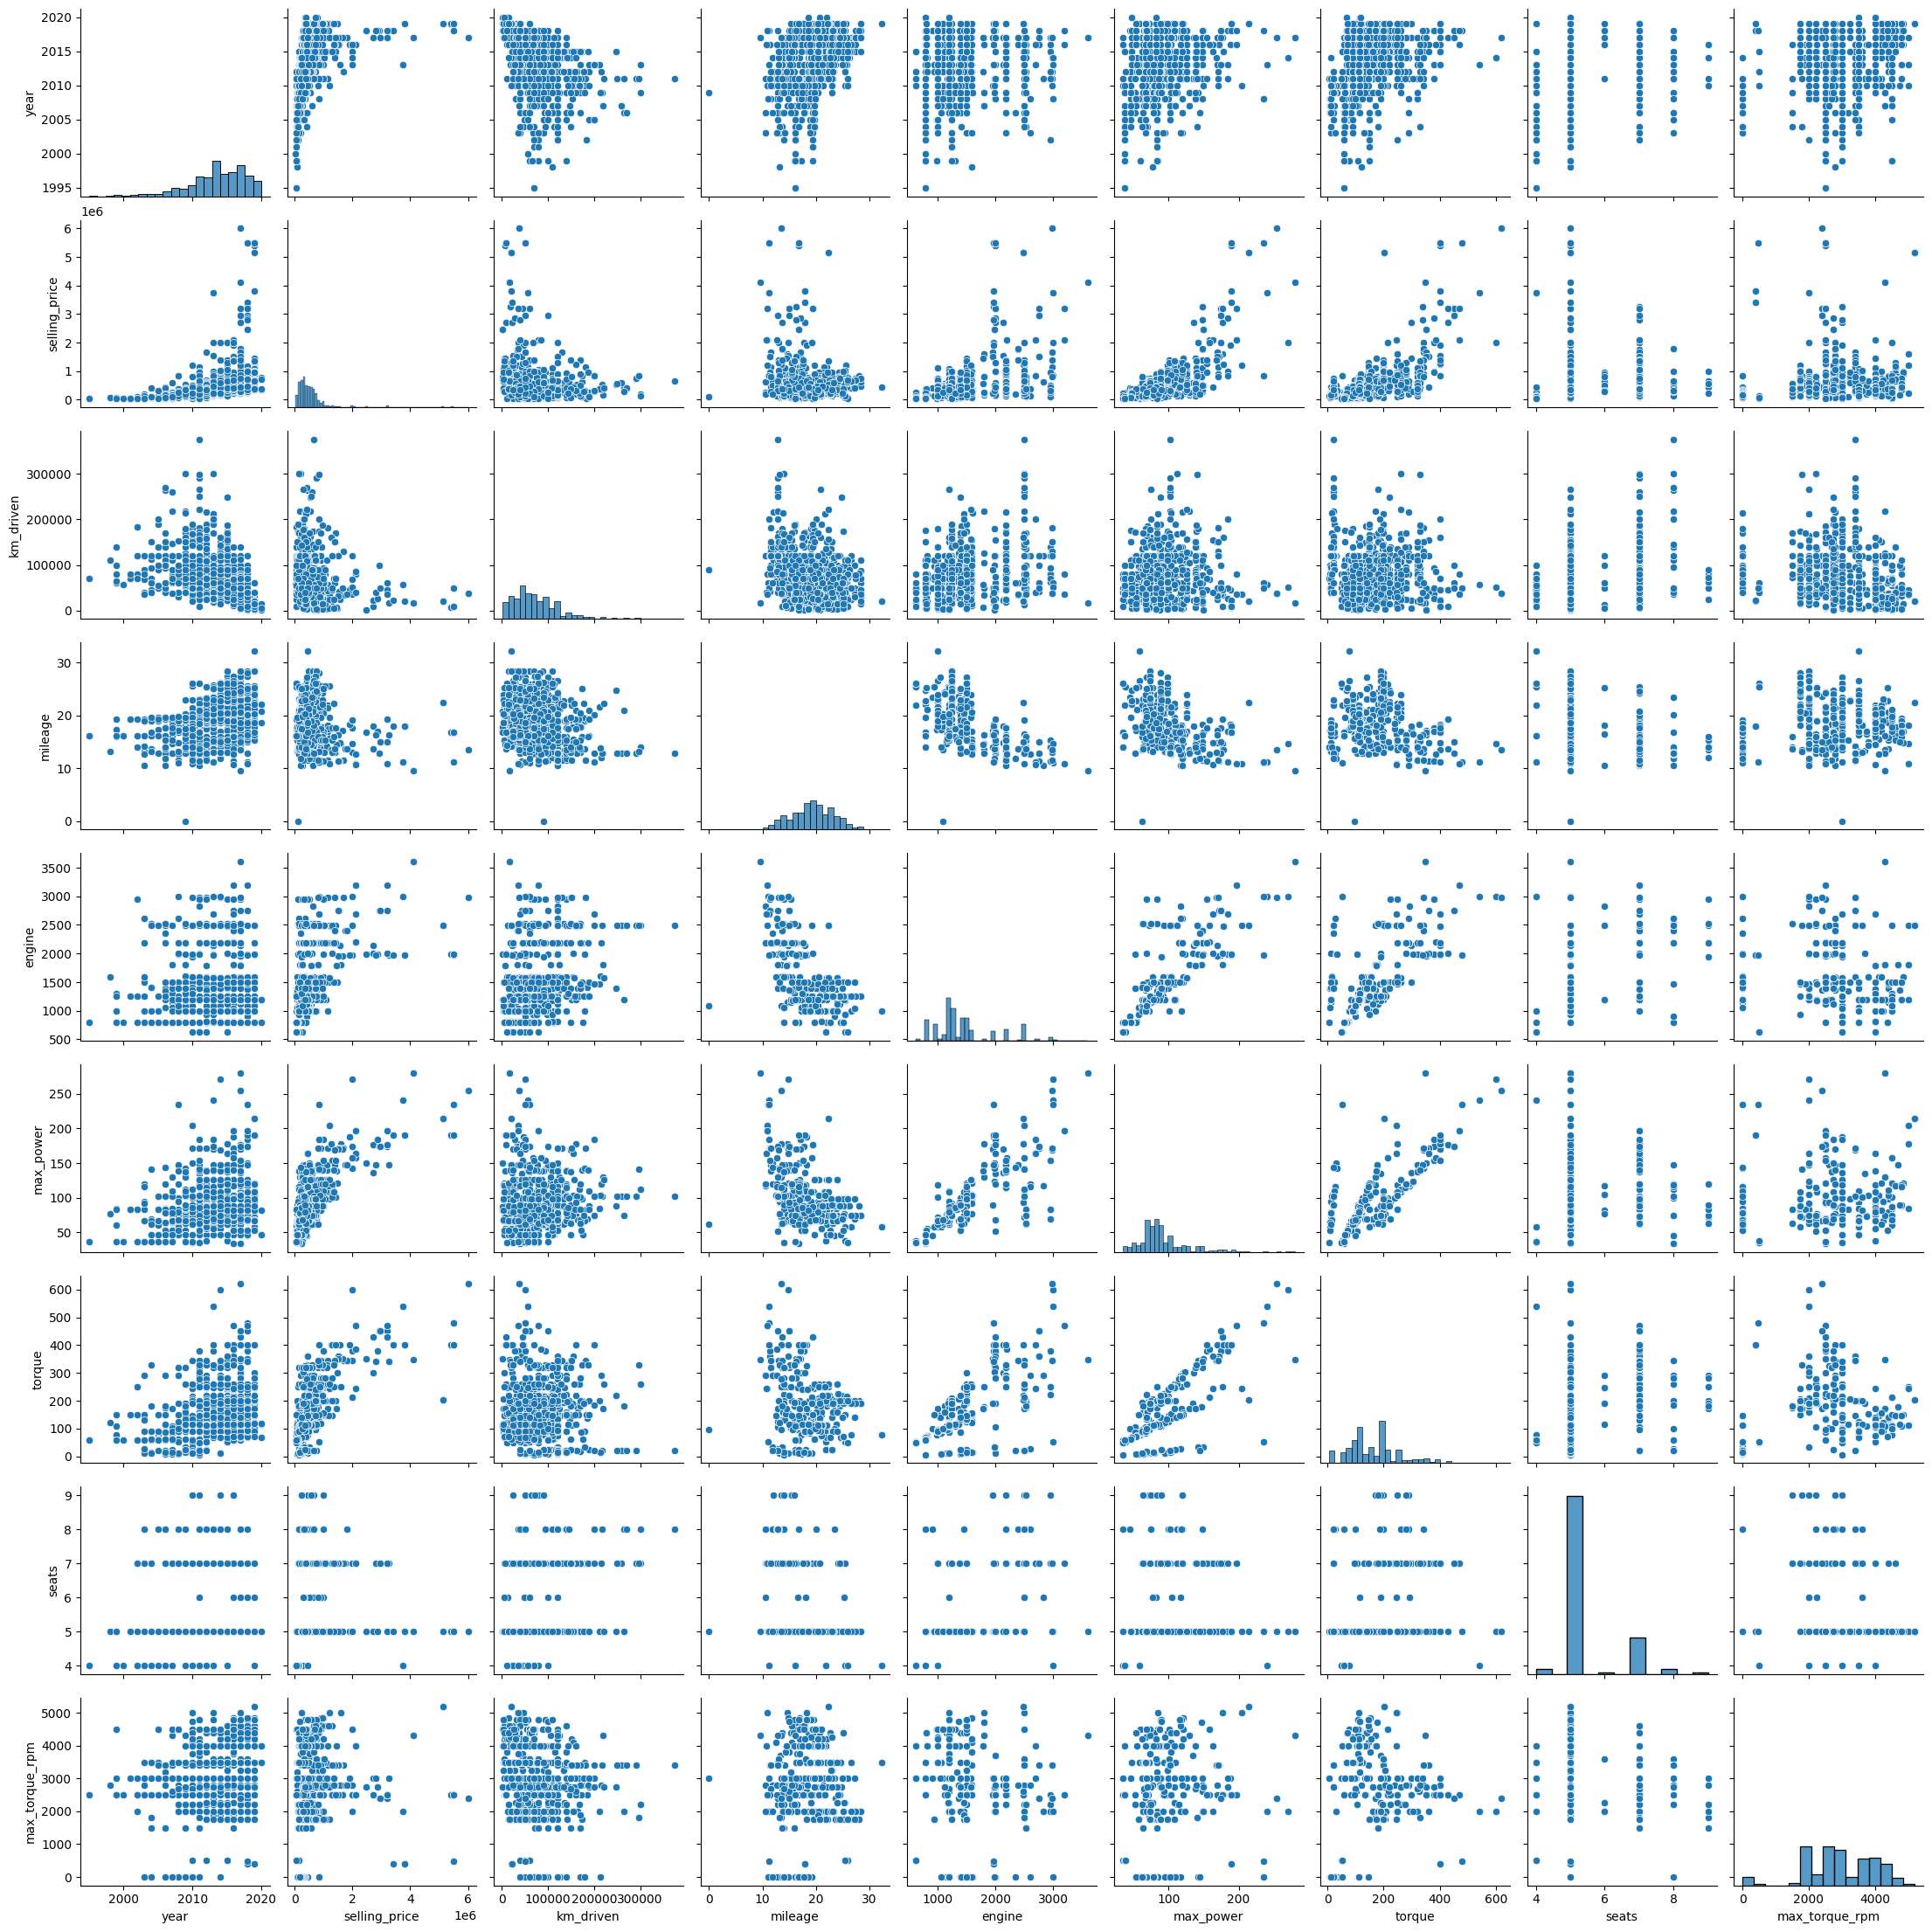

In [ ]:
# your code here
sns.pairplot(df_test.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis = 1))


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

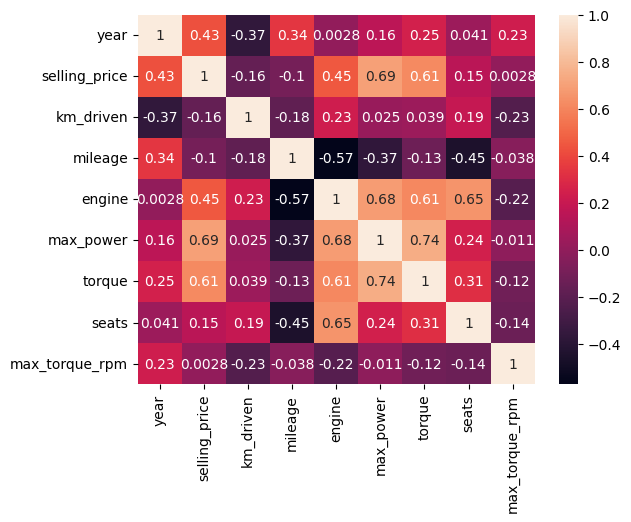

In [ ]:
# your code here
f, ax = plt.subplots()
plot_train = df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis = 1)
sns.heatmap(plot_train.corr(),  ax=ax, annot = True)

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font> \\
Ответ: *Year и Engine* у них корреляция 0.0028
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font> \\
Ответ: Между *Max_power и Torque* которая равна 0.74
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font> \\
Да, это так, видна не сильная корреляция, но ее значение отрицательно -> Чем меньше год, тем больше машина проехала километров

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

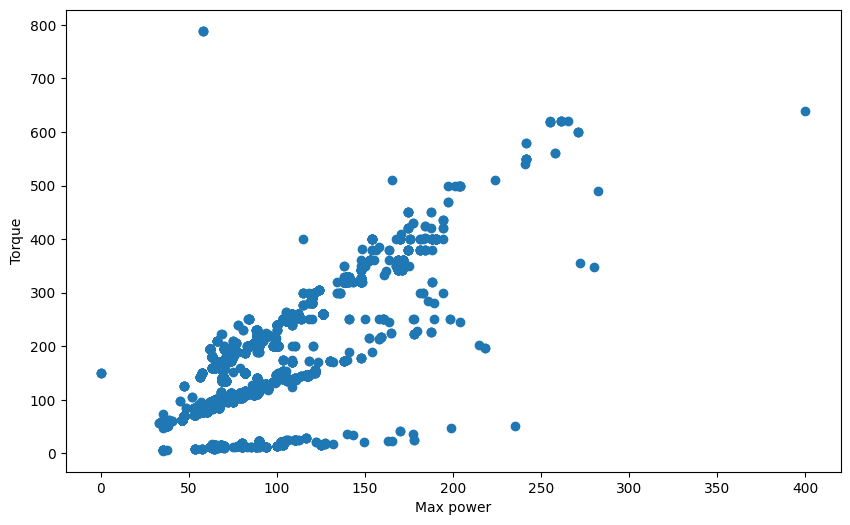

In [ ]:
# your code here
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_train['max_power'], y = df_train['torque'])
plt.xlabel("Max power")
plt.ylabel("Torque")

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

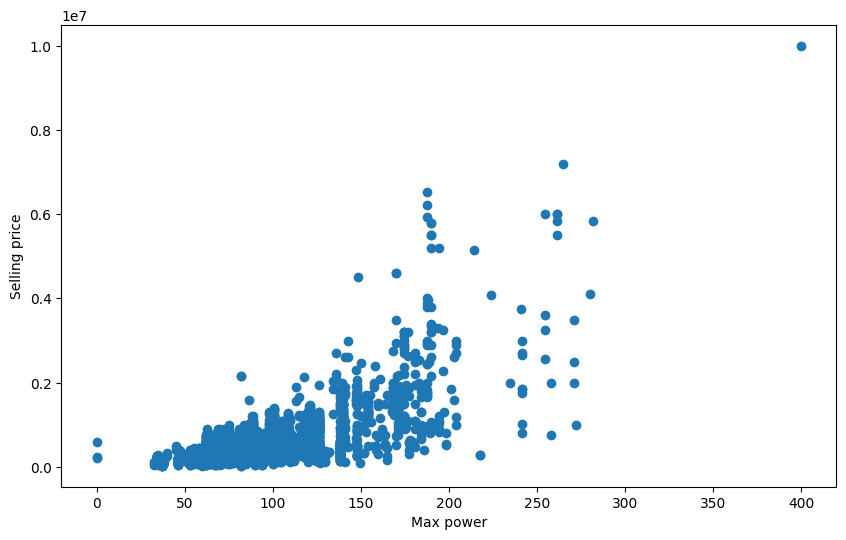

In [ ]:
# your code here
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_train['max_power'], y = df_train['selling_price'])
plt.xlabel("Max power")
plt.ylabel("Selling price")

plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [ ]:
y_train = df_train['selling_price']
X_train = plot_train.drop('selling_price', axis = 1)

In [ ]:
X_train

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.00,5,2000.00
1,2014,120000,21.14,1498,103.52,250.00,5,2500.00
2,2010,127000,23.00,1396,90.00,22.40,5,2750.00
3,2007,120000,16.10,1298,88.20,11.50,5,4.50
4,2017,45000,20.14,1197,81.86,113.75,5,4000.00
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.10,5,3000.00
5836,2013,50000,18.90,998,67.10,90.00,5,3500.00
5837,2013,110000,18.50,1197,82.85,113.70,5,4000.00
5838,2007,119000,16.80,1493,110.00,24.00,5,2.75


In [ ]:
#Тут я добавил max_torque_rpm и torque поэтому вместо 6 должно быть 8
assert X_train.shape == (5840, 8)

In [ ]:
y_test = df_test['selling_price']
X_test = df_test.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'], axis = 1)

In [ ]:
X_test

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2010,168000,14.00,2498,112.00,260.00,7,2200.0
1,2017,25000,21.50,1497,108.50,260.00,5,2750.0
2,2007,218463,12.90,1799,130.00,172.00,5,4300.0
3,2015,173000,25.10,1498,98.60,200.00,5,1750.0
4,2011,70000,16.50,1172,65.00,96.00,5,3000.0
...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04,5,4500.0
996,2017,50000,18.60,1197,81.83,114.70,5,4000.0
997,2009,40000,23.00,1396,90.00,22.40,5,2750.0
998,2012,25000,20.36,1197,78.90,111.80,5,4000.0


In [ ]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [ ]:
def lin_pred(model_type, X_train_, y_train_, X_test_, y_test_):
  trained = model_type.fit(X_train_, y_train_)
  y_train_pred = trained.predict(X_train_)
  y_pred = trained.predict(X_test_)
  print("Train r2 score: ", r2_score(y_train_, y_train_pred))
  print("Train MSE score: ", MSE(y_train_, y_train_pred))
  print("Test r2 score: ", r2_score(y_test_, y_pred))
  print("Test MSE score: ", MSE(y_test_, y_pred))
  return model_type.coef_

In [ ]:
lin_reg = LinearRegression()

model = lin_pred(lin_reg, X_train, y_train, X_test, y_test)

Train r2 score:  0.601707955216565
Train MSE score:  114165769897.88878
Test r2 score:  0.6023877756247209
Test MSE score:  228558860641.83075


In [ ]:
model

array([ 3.92599347e+04, -7.84921167e-01, -1.43518846e+03,  4.82424695e+01,
        9.02690157e+03,  7.40976643e+02, -3.12971365e+04, -3.18830456e+01])

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
scaled_lin_reg = LinearRegression()

scaled_model = lin_pred(scaled_lin_reg, x_train_scaled, y_train, x_test_scaled, y_test)

Train r2 score:  0.6017079552165656
Train MSE score:  114165769897.88857
Test r2 score:  0.6023877756247233
Test MSE score:  228558860641.8293


In [ ]:
scaled_model

array([160780.08299295, -47147.06949094,  -5720.13288169,  23427.56837252,
       285590.48741794,  67552.23222271, -30741.92037145, -34500.83654309])

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [ ]:
# your code here
print("max_power - самый информативный признак. Он имеет самый большой вес в модели")

max_power - самый информативный признак. Он имеет самый большой вес в модели


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.linear_model import Lasso

# your code here
lasso_reg = Lasso(alpha = 10)
lasso = lin_pred(lasso_reg, x_train_scaled, y_train, x_test_scaled, y_test)

Train r2 score:  0.6017079507015554
Train MSE score:  114165771192.06361
Test r2 score:  0.6023744295024864
Test MSE score:  228566532373.99814


In [ ]:
lasso

array([160757.69778314, -47138.1715497 ,  -5690.69135963,  23405.86044562,
       285607.71828878,  67542.23235451, -30703.83140531, -34482.83647131])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [ ]:
# your code here
print("Нет, не занулила, потому что все веса имеют большие значения и не стремятся к нулю")

Нет, не занулила, потому что все веса имеют большие значения и не стремятся к нулю


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(Lasso(), param_grid= {'alpha': (np.logspace(-8, 10, 100))}, cv = 10)

In [ ]:
import datetime

start = datetime.datetime.now()
grid_train = grid_search.fit(x_train_scaled, y_train)
end = datetime.datetime.now()

In [ ]:
train_grid_pred = grid_train.predict(x_train_scaled)

In [ ]:
test_grid_pred = grid_train.predict(x_test_scaled)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [ ]:
# your code here
print("Грид сёрч обучал модель примерно: ", end - start)
print(grid_train.best_score_)
print(grid_train.best_params_)

Грид сёрч обучал модель примерно:  0:00:07.542518
0.5838130707091974
{'alpha': 23101.29700083158}


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_grid_search = GridSearchCV(ElasticNet(), param_grid= {'alpha': (np.logspace(-8, 10, 100))}, cv = 10)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
# your code here
start = datetime.datetime.now()
grid_train = elastic_grid_search.fit(x_train_scaled, y_train)
end = datetime.datetime.now()
train_grid_pred = grid_train.predict(x_train_scaled)
test_grid_pred = grid_train.predict(x_test_scaled)

In [ ]:
print("Грид сёрч обучал модель примерно: ", end - start)
print(grid_train.best_score_)
print(grid_train.best_params_)

Грид сёрч обучал модель примерно:  0:00:05.225574
0.5831242060513376
{'alpha': 0.2848035868435805}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
# your code here
X_train_cat = df_train.drop(['name', 'selling_price'], axis =1)
X_test_cat = df_test.drop(['name', 'selling_price'], axis =1)

In [ ]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.00
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.00
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.40,5,2750.00
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.50,5,4.50
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.10,5,3000.00
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.00,5,3500.00
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.70,5,4000.00
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.00,5,2.75


In [ ]:
#Я добавил torque и max_torque и не буду их удалять
#assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['fuel', 'seller_type', 'transmission', 'owner', 'seats']),
    remainder='passthrough', verbose_feature_names_out = False)

transformed = transformer.fit_transform(X_train_cat)
x_train_ohe = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

x_test_ohe = pd.DataFrame(transformer.transform(X_test_cat), columns=transformer.get_feature_names_out())

In [ ]:
x_train_ohe

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,seats_9,seats_10,seats_14,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2014.0,145500.0,23.40,1248.0,74.00,190.00,2000.00
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2014.0,120000.0,21.14,1498.0,103.52,250.00,2500.00
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2010.0,127000.0,23.00,1396.0,90.00,22.40,2750.00
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2007.0,120000.0,16.10,1298.0,88.20,11.50,4.50
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2017.0,45000.0,20.14,1197.0,81.86,113.75,4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2008.0,191000.0,17.92,1086.0,62.10,96.10,3000.00
5836,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2013.0,50000.0,18.90,998.0,67.10,90.00,3500.00
5837,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2013.0,110000.0,18.50,1197.0,82.85,113.70,4000.00
5838,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2007.0,119000.0,16.80,1493.0,110.00,24.00,2.75


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
ridge_grid_search = GridSearchCV(Ridge(), param_grid= {'alpha': (np.logspace(-8, 10, 100))}, cv = 10, scoring='r2')

In [ ]:
from pickle import dump

df_scaler = StandardScaler()

x_train_scaled = pd.DataFrame(df_scaler.fit_transform(x_train_ohe),
                                                    index=x_train_ohe.index, columns=x_train_ohe.columns)

x_test_scaled = pd.DataFrame(df_scaler.transform(x_test_ohe),
                                                    index=x_test_ohe.index, columns=x_test_ohe.columns)


dump(model, open('model.pkl', 'wb'))
# save scaler
dump(df_scaler, open('scale.pkl', 'wb'))

In [ ]:
start = datetime.datetime.now()
grid_train = ridge_grid_search.fit(x_train_scaled, y_train)
end = datetime.datetime.now()
train_grid_pred = grid_train.predict(x_train_scaled)
test_grid_pred = grid_train.predict(x_test_scaled)

In [ ]:
print("Train r2: ", r2_score(y_train, train_grid_pred))
print("Train MSE: " ,MSE(y_train, train_grid_pred))
print("Test r2: ", r2_score(y_test, test_grid_pred))
print("Test MSE: ", MSE(y_test, test_grid_pred))

Train r2:  0.6704749400899739
Train MSE:  94454515619.89291
Test r2:  0.6254814374399397
Test MSE:  215283964376.18585


In [ ]:
grid_train.best_score_

0.6272876262992788

In [ ]:
grid_train.best_params_

{'alpha': 533.6699231206323}

In [ ]:
print("Удалось улучшить score модели, но ненамного")

Удалось улучшить score модели, но ненамного


# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
#Работа с выбросами

import scipy.stats as stats

df_concat = pd.concat([x_train_scaled, y_train], axis=1)
'''
Q1 = np.percentile(df_concat['max_power'], 25, method='midpoint')
Q3 = np.percentile(df_concat['max_power'], 75, method='midpoint')
IQR = Q3 - Q1

upper = Q3 + 1.5* IQR

lower = Q1 - 1.5 * IQR

upper_array = np.where(df_concat['max_power']>=upper)[0]
lower_array = np.where(df_concat['max_power']<=lower)[0]

df_concat.drop(index=upper_array, inplace=True)
df_concat.drop(index=lower_array, inplace=True)
'''

"\nQ1 = np.percentile(df_concat['max_power'], 25, method='midpoint')\nQ3 = np.percentile(df_concat['max_power'], 75, method='midpoint')\nIQR = Q3 - Q1\n\nupper = Q3 + 1.5* IQR\n\nlower = Q1 - 1.5 * IQR\n\nupper_array = np.where(df_concat['max_power']>=upper)[0]\nlower_array = np.where(df_concat['max_power']<=lower)[0]\n\ndf_concat.drop(index=upper_array, inplace=True)\ndf_concat.drop(index=lower_array, inplace=True)\n"

In [ ]:
df_concat

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,seats_10,seats_14,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,selling_price
0,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-0.055603,-0.013087,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.314704,-0.817797,450000
1,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,-0.055603,-0.013087,0.139570,0.766619,0.428830,0.141162,0.493513,0.972840,-0.355735,370000
2,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-0.055603,-0.013087,-0.837167,0.883158,0.895506,-0.068879,0.066175,-1.523691,-0.124704,225000
3,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-0.055603,-0.013087,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-1.643253,-2.661886,130000
4,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-0.055603,-0.013087,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.521678,1.030450,440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-0.055603,-0.013087,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,-0.715280,0.106327,120000
5836,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,-0.055603,-0.013087,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,-0.782191,0.568389,260000
5837,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-0.055603,-0.013087,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,-0.522227,1.030450,320000
5838,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,-0.055603,-0.013087,-1.569719,0.749971,-0.660081,0.130865,0.698332,-1.506141,-2.663504,135000


In [ ]:
grid_train = ridge_grid_search.fit(df_concat.drop('selling_price', axis = 1), df_concat['selling_price'])
print(grid_train.best_score_)
train_grid_pred = grid_train.predict(df_concat.drop('selling_price', axis = 1))
test_grid_pred = grid_train.predict(x_test_scaled)

0.6272876262992788


In [ ]:
print("Train r2: ", r2_score(df_concat['selling_price'], train_grid_pred))
print("Train MSE: " ,MSE(df_concat['selling_price'], train_grid_pred))
print("Test r2: ", r2_score(y_test, test_grid_pred))
print("Test MSE: ", MSE(y_test, test_grid_pred))

Train r2:  0.6704749400899737
Train MSE:  94454515619.89297
Test r2:  0.6254814374399389
Test MSE:  215283964376.1863


In [ ]:
# your code here
#x^2
squared_features = ['year','engine','max_power', 'torque']
#1/x
hyperbole_features = ['km_driven']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def convert_poly_features(df):
  poly_squred = PolynomialFeatures(2)
  squared = poly_squred.fit_transform(df[squared_features])
  df_squared_f = poly_squred.get_feature_names_out()
  df[df_squared_f] = squared
  df['km_driven^0.5'] = df['km_driven'].apply(lambda x: x**-1)
  return df

In [ ]:
df_train_poly = convert_poly_features(df_concat.drop('selling_price', axis = 1))
df_test_poly = convert_poly_features(x_test_scaled)

In [ ]:
df_test_poly

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,year engine,year max_power,year torque,engine^2,engine max_power,engine torque,max_power^2,max_power torque,torque^2,km_driven^0.5
0,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-1.842084,-0.637542,-0.906258,4.841670,1.675694,2.381976,0.579955,0.824398,1.171871,0.638675
1,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,0.121314,0.567682,0.944098,0.019349,0.090545,0.150582,0.423697,0.704641,1.171871,-1.227033
2,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,3.253813,-3.253813,0.787954,...,-1.194534,-2.088494,-0.184070,0.579100,1.012484,0.089235,1.770201,0.156017,0.013751,0.415651
3,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,0.054171,0.129710,0.162862,0.019927,0.047713,0.059908,0.114246,0.143446,0.180110,0.606435
4,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,0.314366,0.429332,0.424799,0.281052,0.383835,0.379783,0.524207,0.518672,0.513196,-15.197952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,0.937466,0.831928,0.905382,0.500183,0.443874,0.483065,0.393903,0.428682,0.466532,2.305995
996,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,-0.417453,-0.167501,-0.445879,0.229118,0.091933,0.244720,0.036887,0.098193,0.261384,-2.507740
997,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,0.074482,-0.071559,1.647645,0.004744,-0.004558,0.104950,0.004379,-0.100830,2.321635,-1.769132
998,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,0.166957,0.099293,0.189421,0.229118,0.136262,0.259946,0.081038,0.154596,0.294923,-1.227033


In [ ]:
df_train_poly

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,year engine,year max_power,year torque,engine^2,engine max_power,engine torque,max_power^2,max_power torque,torque^2,km_driven^0.5
0,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-0.052149,-0.061348,0.043923,0.139609,0.164235,-0.117587,0.193205,-0.138328,0.099038,0.839523
1,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,0.019702,0.068879,0.135779,0.019927,0.069665,0.137328,0.243555,0.480110,0.946418,1.304428
2,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,0.057663,-0.055400,1.275584,0.004744,-0.004558,0.104950,0.004379,-0.100830,2.321635,1.132300
3,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,0.424895,-0.014569,2.579445,0.073269,-0.002512,0.444799,0.000086,-0.015251,2.700280,1.304428
4,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,-0.417453,-0.166674,-0.454967,0.229118,0.091479,0.249708,0.036524,0.099699,0.272148,-2.074658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,0.937466,1.081217,0.948129,0.500183,0.576881,0.505872,0.665340,0.583442,0.511626,0.513175
5836,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,0.092944,0.068799,0.081828,0.789339,0.584283,0.694935,0.432497,0.514404,0.611822,-2.507740
5837,-0.092928,-1.092252,-0.076525,1.124475,-0.335864,0.343702,-0.065568,-0.307332,0.307332,0.787954,...,0.050075,0.016720,0.054632,0.229118,0.076500,0.249971,0.025543,0.083463,0.272721,1.666289
5838,-0.092928,0.915539,-0.076525,-0.889304,-0.335864,0.343702,-0.065568,-0.307332,0.307332,-1.269110,...,-0.205422,-1.096185,2.364218,0.017126,0.091388,-0.197102,0.487668,-1.051787,2.268461,1.333385


In [ ]:
ridge_grid_search = GridSearchCV(Ridge(max_iter=1000), param_grid= {'alpha': (np.logspace(-8, 8, 100))}, cv = 5, scoring='r2', error_score='raise')

In [ ]:
grid_train = ridge_grid_search.fit(df_train_poly, df_concat['selling_price'])
print(grid_train.best_score_)
print(grid_train.best_params_)
train_grid_pred = grid_train.predict(df_train_poly)
test_grid_pred = grid_train.predict(df_test_poly)

0.8065191568870199
{'alpha': 5.214008287999695e-05}


In [ ]:
print("Train r2: ", r2_score(df_concat['selling_price'], train_grid_pred))
print("Train MSE: " , MSE(df_concat['selling_price'], train_grid_pred))
print("Test r2: ", r2_score(y_test, test_grid_pred))
print("Test MSE: ", MSE(y_test, test_grid_pred))

Train r2:  0.8364433759338556
Train MSE:  46881598949.74512
Test r2:  0.8171517789451398
Test MSE:  105106378810.02428


In [ ]:
print("Test RMSE: ", MSE(y_test, test_grid_pred)**0.5)

Test RMSE:  324201.13943356875


Предикт на тесте показывает очень плохие результаты при избавлении от выбросов \\
Поэтому повторим эксперимент, но без исключения выбросов


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    df_test_business = df_test[['name', 'selling_price']].copy()
    df_test_business['pred_selling_price'] = y_pred
    display(df_test_business[abs(y_pred - y_true) < y_true * 0.1].round(1))
    print(y_pred[abs(y_pred - y_true) < y_true * 0.1].shape[0] / y_pred.shape[0])

business_metrics(y_test, test_grid_pred)

,name,selling_price,pred_selling_price
2,Honda Civic 1.8 S AT,175000,188044.9
3,Honda City i DTEC VX,635000,610977.9
13,Hyundai i10 Magna,142000,140864.7
15,Jeep Wrangler 2016-2019 3.6 4X4,4100000,4383379.8
19,Hyundai Accent Executive,250000,246463.4
...,...,...,...
984,Maruti Ritz VDi,300000,310680.1
985,Honda City 2017-2020 EXi,158000,169712.2
988,Maruti Alto 800 LXI Anniversary Edition,240000,217924.0
996,Hyundai i20 2015-2017 Sportz 1.2,440000,466823.7


0.269


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Код с реализацией сервиса находится на гитхабе


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return grid_train.predict(item)


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: ignored

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link